In [2]:
# Load libraries
import pandas as pd  # Used for data manipulation
import numpy as np  # Used for numerical operations
import seaborn as sns  # Used for data visualization
import matplotlib.pyplot as plt  # Used for plotting
from sklearn.feature_selection import RFE # Used for Selecting Important features
from sklearn.model_selection import train_test_split,GridSearchCV # Used for model selection and hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier, plot_tree # Used for Decision Tree predictions
from sklearn.ensemble import AdaBoostClassifier # Used for strengthing classifers
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error, classification_report, roc_curve # Used for model evaluation


# Load the medical dataset
medical = pd.read_csv('medical_clean.csv')

In [3]:
# Check for duplicates in the dataset
print(medical.duplicated().value_counts())

# Identify missing values in each column
missing_values = medical.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

False    10000
Name: count, dtype: int64
Missing Values in Each Column:
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [4]:
# Define a function to count outliers using IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Select numeric columns for outlier detection
numeric_columns = medical.select_dtypes(include=['float64', 'int64'])

# Count outliers for each numeric column
count_outliers = numeric_columns.apply(count_outliers)

# Display the count of outliers
print(count_outliers)

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              411
Age                     0
Income                326
VitD_levels            60
Doc_visits              0
Full_meals_eaten        8
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64



Column: Lat
Lower Whisker: 25.07153749999999
Upper Whisker: 52.22775750000001
Count of Outliers: 150


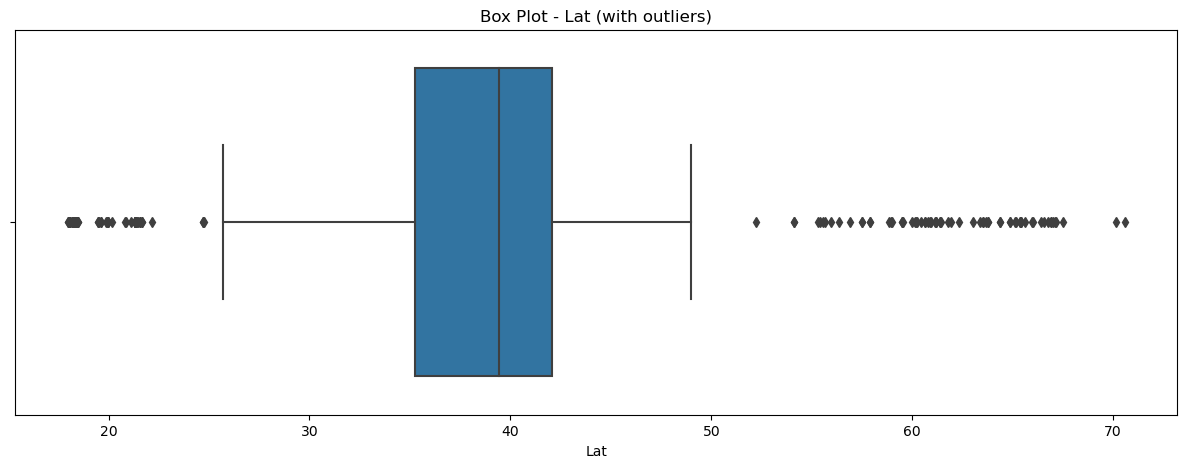


Column: Lng
Lower Whisker: -122.72538124999998
Upper Whisker: -55.065651250000016
Count of Outliers: 237


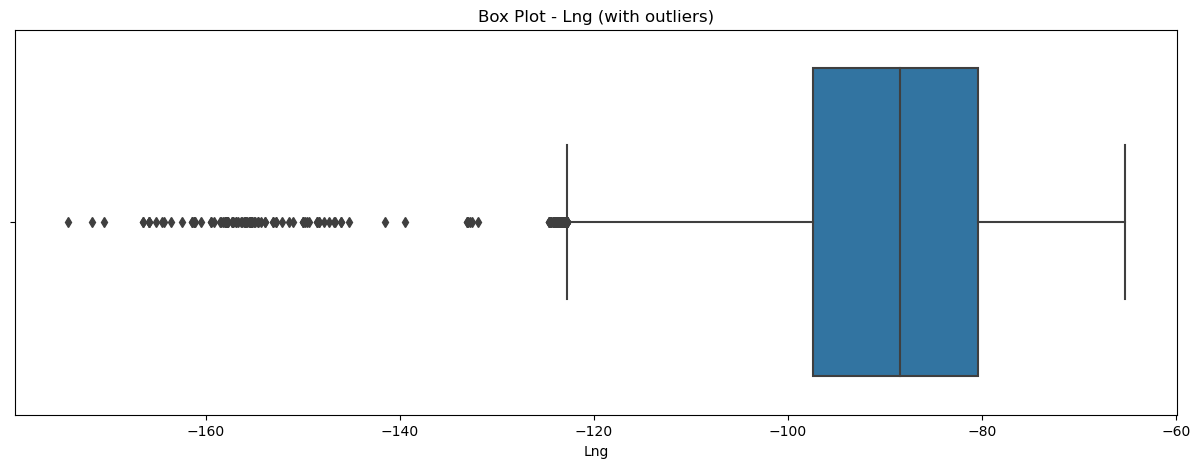


Column: Population
Lower Whisker: -19180.625
Upper Whisker: 33820.375
Count of Outliers: 855


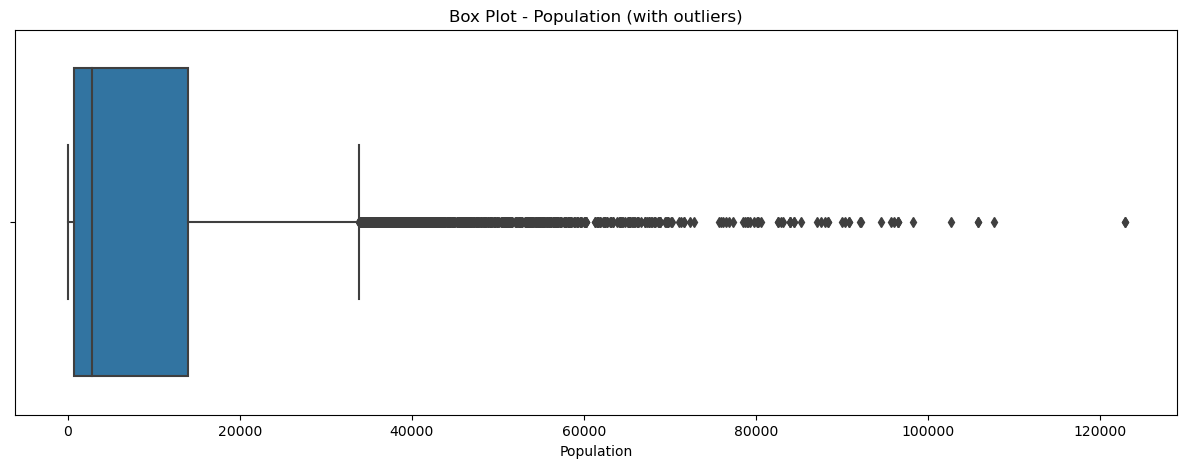


Column: Children
Lower Whisker: -4.5
Upper Whisker: 7.5
Count of Outliers: 411


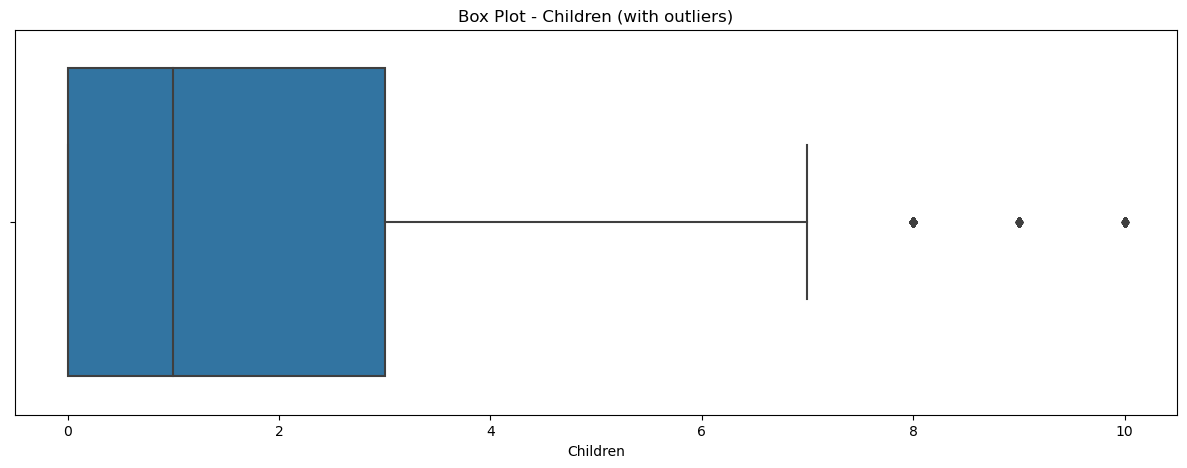


Column: Income
Lower Whisker: -32447.666249999987
Upper Whisker: 106342.84374999999
Count of Outliers: 326


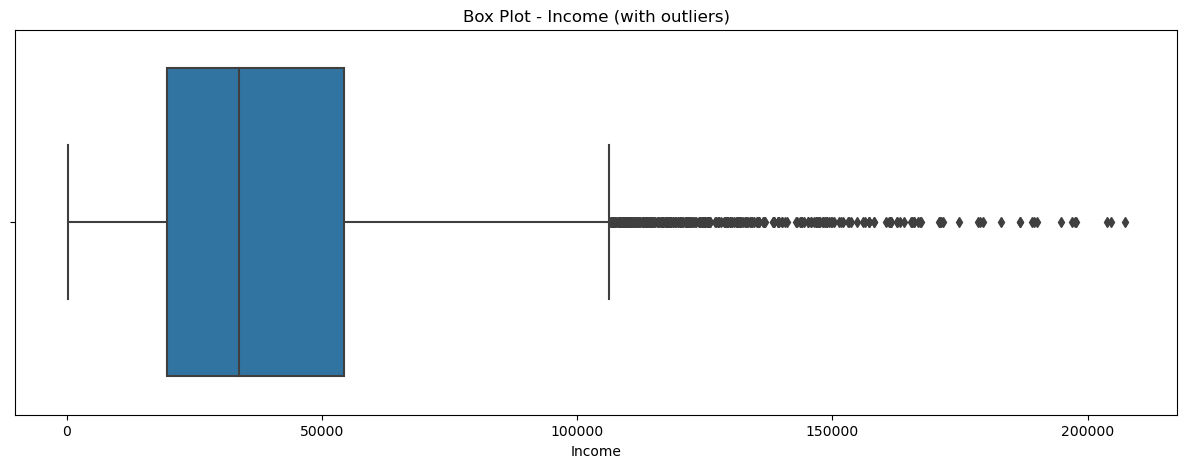


Column: VitD_levels
Lower Whisker: 12.544152781249997
Upper Whisker: 23.430248331250006
Count of Outliers: 60


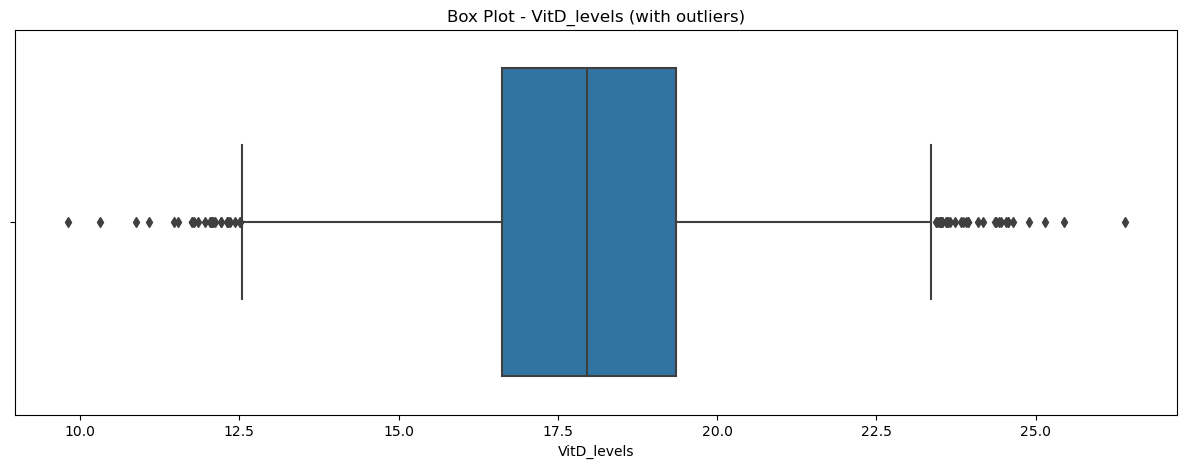


Column: Full_meals_eaten
Lower Whisker: -3.0
Upper Whisker: 5.0
Count of Outliers: 8


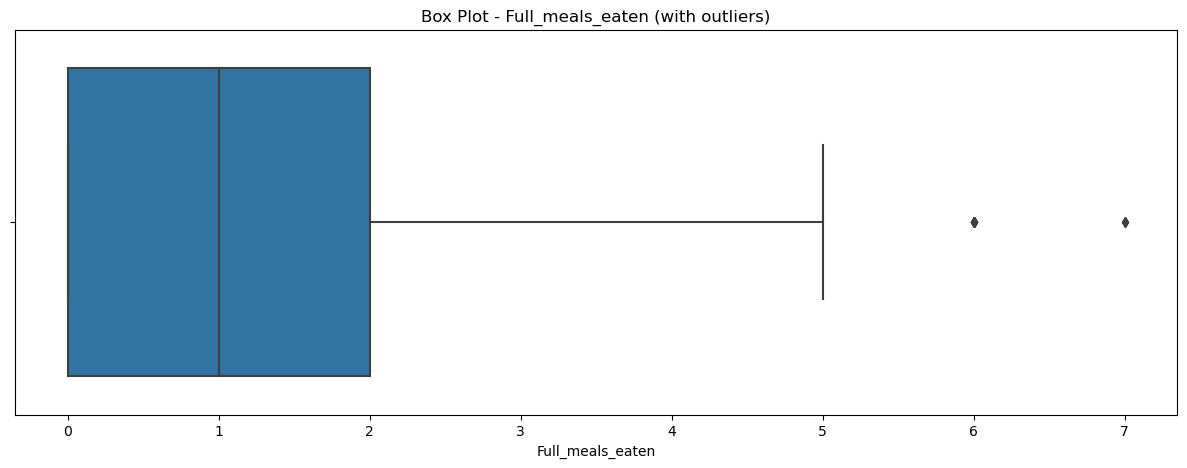


Column: vitD_supp
Lower Whisker: -1.5
Upper Whisker: 2.5
Count of Outliers: 70


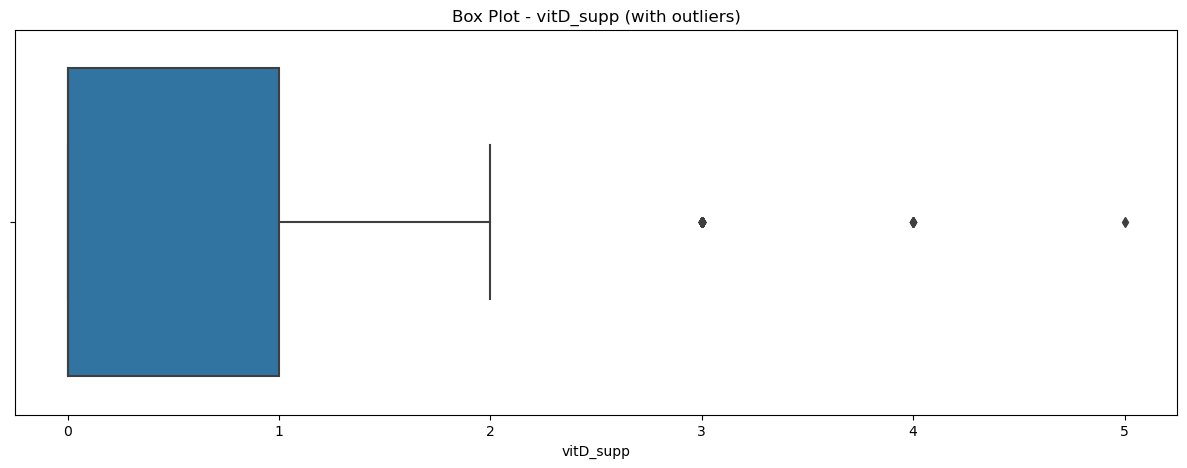


Column: Additional_charges
Lower Whisker: -3473.5156124999994
Upper Whisker: 27086.4933675
Count of Outliers: 424


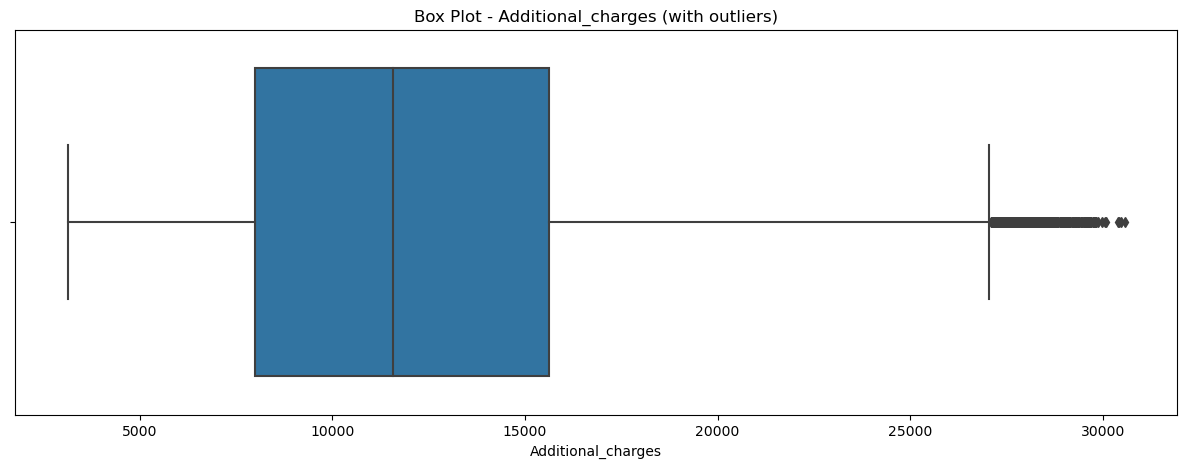


Column: Item1
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 449


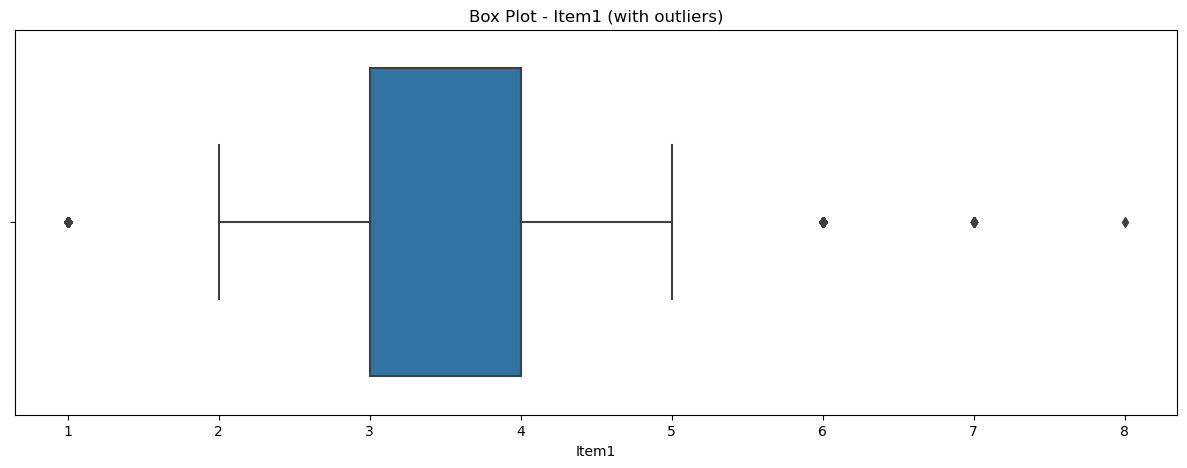


Column: Item2
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 429


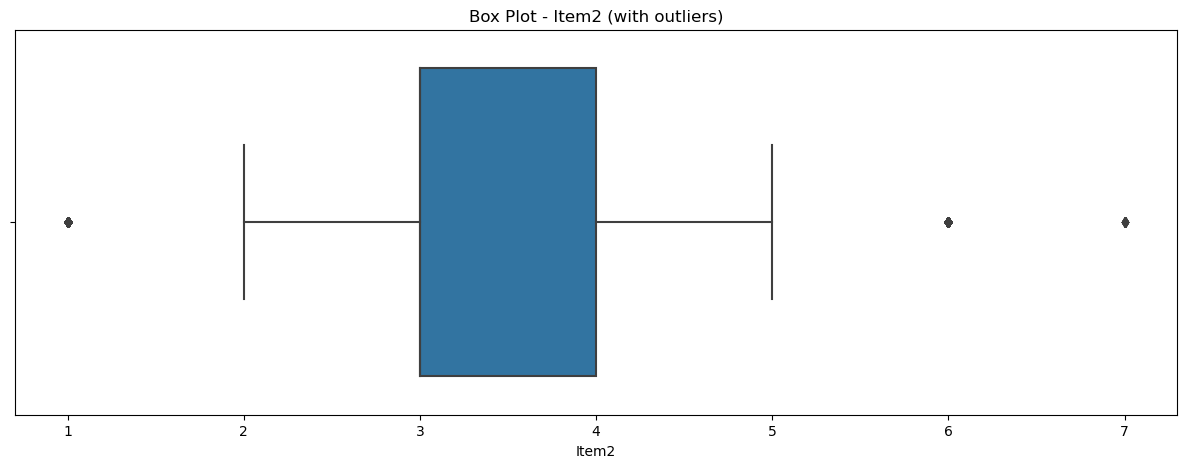


Column: Item3
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


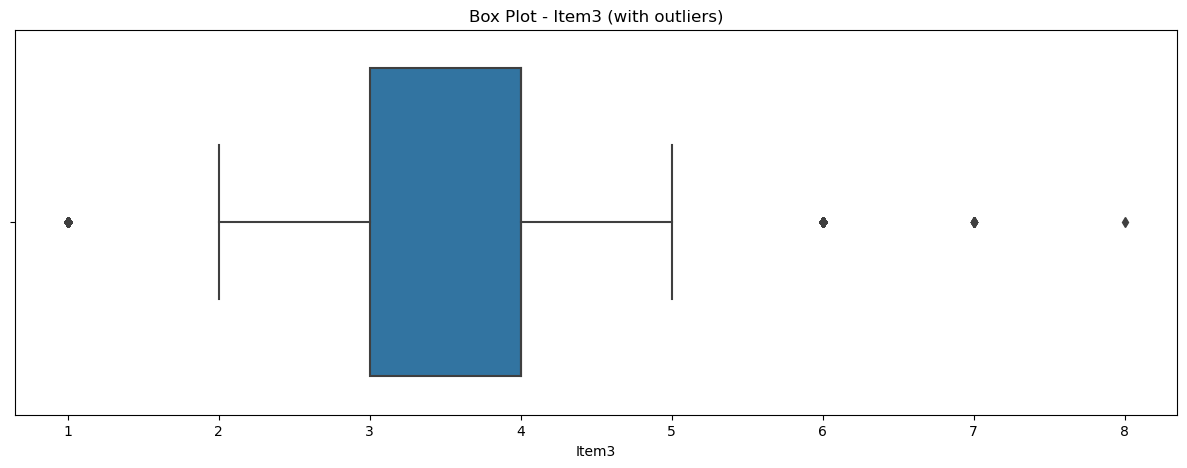


Column: Item4
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 450


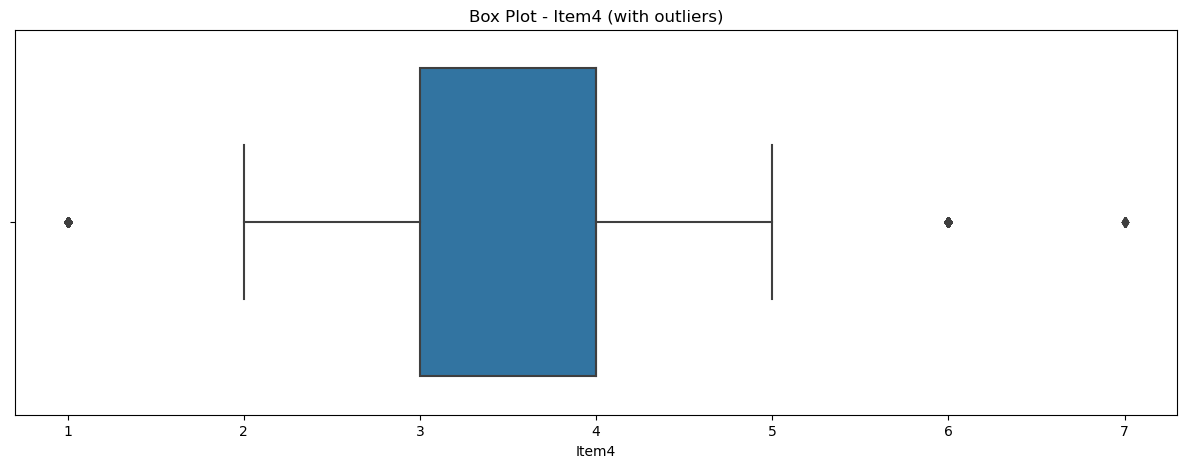


Column: Item5
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


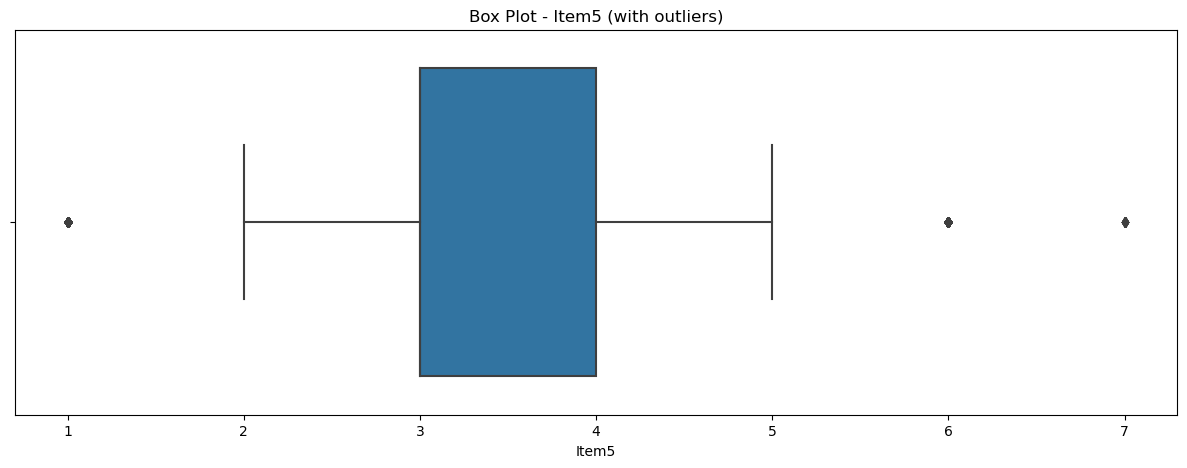


Column: Item6
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


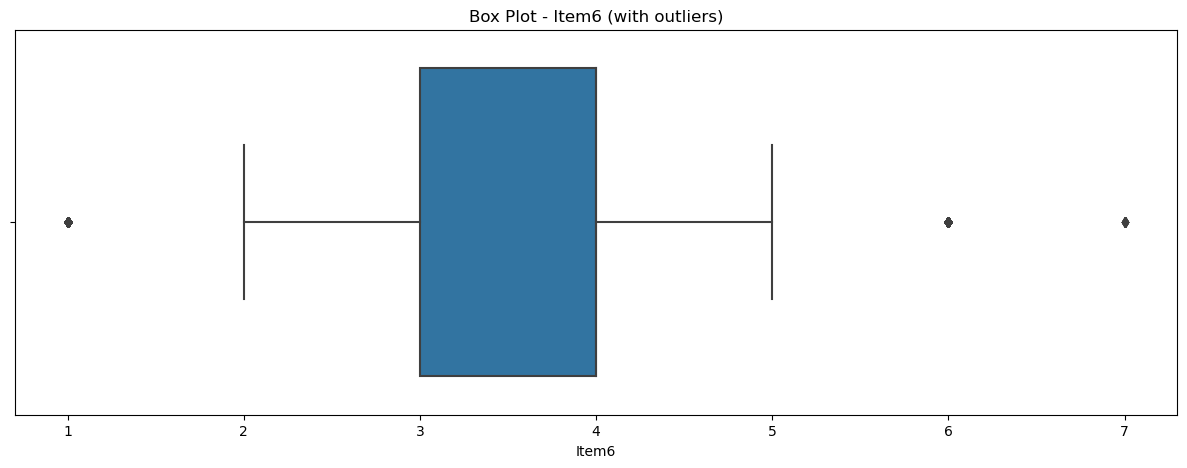


Column: Item7
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 438


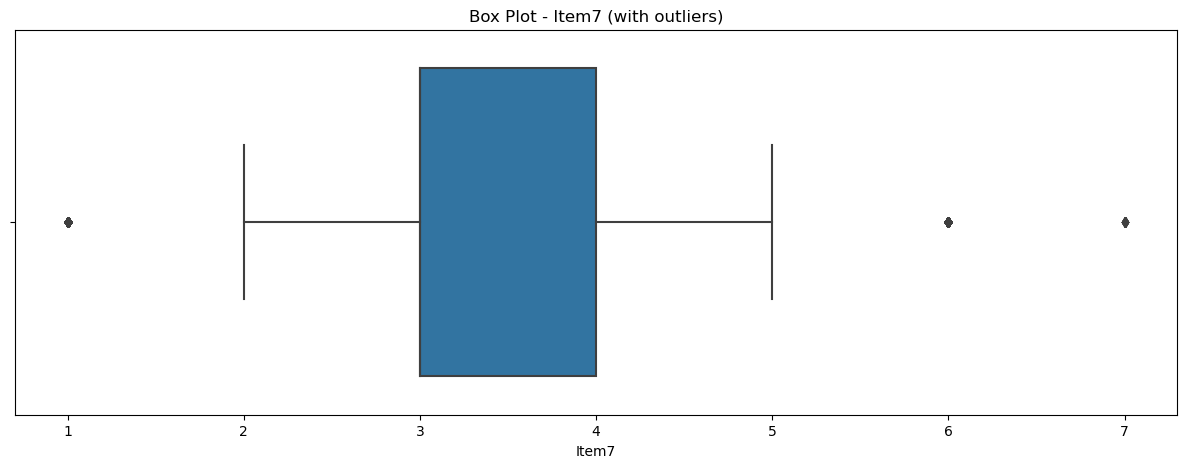


Column: Item8
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 442


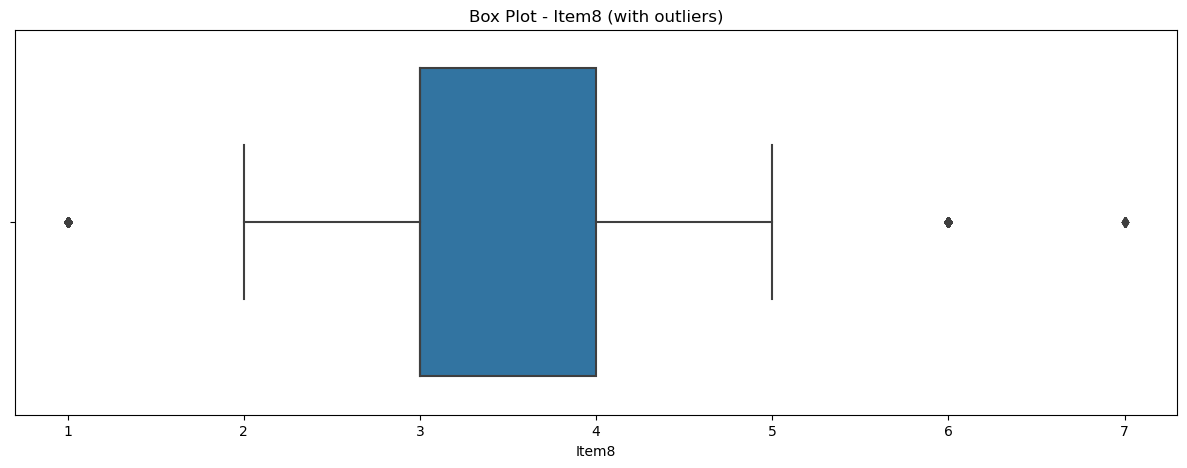

In [5]:
# Calculate descriptive statistics and identify outliers for specific columns of interest
columns_of_interest = ['Lat', 'Lng', 'Population', 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten',
                       'vitD_supp', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
                       'Item5', 'Item6', 'Item7', 'Item8']

# Check if columns of interest exist in the DataFrame
for col in columns_of_interest:
    if col not in medical.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Calculate descriptive statistics for each column
stats = medical[columns_of_interest].describe()

# Identify columns with outliers
for col in columns_of_interest:
    q1 = stats.loc['25%', col]
    q3 = stats.loc['75%', col]
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    outliers = (medical[col] < lower_whisker) | (medical[col] > upper_whisker)
    print(f"\nColumn: {col}")
    print(f"Lower Whisker: {lower_whisker}")
    print(f"Upper Whisker: {upper_whisker}")
    print(f"Count of Outliers: {outliers.sum()}")
    if outliers.any():
        plt.figure(figsize=(15, 5))
        sns.boxplot(x=medical[col])
        plt.title(f'Box Plot - {col} (with outliers)')
        plt.show()


In [6]:
# Target Variable
Y = medical['Anxiety']

# Feature Data
# Define columns to be dropped
columns_to_drop = ["Anxiety", "CaseOrder", "City","Customer_id", "State", "County", "UID","Interaction","Job","TimeZone"]

X = medical.drop(columns_to_drop, axis=1).copy()

In [7]:
# Select only the numerical columns from X
numerical_columns = X.select_dtypes(include=['int64', 'float64'])

# Summary statistics for numerical features
summary_X = numerical_columns.describe()
print("Summary statistics for X (numerical features only):")
print(summary_X)

# Summary statistics for Y
summary_Y = Y.value_counts()
print("\nSummary statistics for Y:")
print(summary_Y)

# Select only the categorical columns from X
categorical_columns = X.select_dtypes(include=['object'])

# Summary statistics for categorical features
summary_categorical = {}

# Loop through each categorical column
for column in categorical_columns.columns:
    # Calculate frequency counts for each category
    frequency_counts = categorical_columns[column].value_counts()
    # Store the frequency counts in the summary dictionary
    summary_categorical[column] = frequency_counts

# Display summary statistics for categorical features
print("\nSummary statistics for X (categorical features only):")
for column, counts in summary_categorical.items():
    print(f"\n{column}:\n{counts}")

Summary statistics for X (numerical features only):
                Zip           Lat           Lng     Population      Children  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean   50159.323900     38.751099    -91.243080    9965.253800      2.097200   
std    27469.588208      5.403085     15.205998   14824.758614      2.163659   
min      610.000000     17.967190   -174.209700       0.000000      0.000000   
25%    27592.000000     35.255120    -97.352982     694.750000      0.000000   
50%    50207.000000     39.419355    -88.397230    2769.000000      1.000000   
75%    72411.750000     42.044175    -80.438050   13945.000000      3.000000   
max    99929.000000     70.560990    -65.290170  122814.000000     10.000000   

                Age         Income   VitD_levels    Doc_visits  \
count  10000.000000   10000.000000  10000.000000  10000.000000   
mean      53.511700   40490.495160     17.964262      5.012200   
std       20.638538   28521.1

In [8]:
print("Nominal Categorical Variables:", "Marital, Gender, ReAdmis, Soft_drink, Initial_admin, HighBlood, Stroke, Arthritis, Diabetes, Hyperlipidemia, BackPain, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services")
print("Numeric Variables:")
print("Discrete:", "Population, Children, Doc_visits, Full_meals_eaten, vitD_supp, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8")
print("Continuous:", "Age, Income, VitD_levels, Initial_days, TotalCharge, Additional_charge")

Nominal Categorical Variables: Marital, Gender, ReAdmis, Soft_drink, Initial_admin, HighBlood, Stroke, Arthritis, Diabetes, Hyperlipidemia, BackPain, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services
Numeric Variables:
Discrete: Population, Children, Doc_visits, Full_meals_eaten, vitD_supp, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8
Continuous: Age, Income, VitD_levels, Initial_days, TotalCharge, Additional_charge


In [9]:
# Replace boolean values with integers
Y = Y.replace({'Yes': 1,'No': 0})

In [10]:
# Unique variables
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Column '{column}' has unique values: {unique_values}")

Column 'Zip' has unique values: [35621 32446 57110 ...  8340 57775 15108]
Column 'Lat' has unique values: [34.3496  30.84513 43.54321 ... 39.43609 44.10354 40.49998]
Column 'Lng' has unique values: [ -86.72508  -85.22907  -96.63772 ...  -74.87302 -102.0159   -80.19959]
Column 'Population' has unique values: [ 2951 11303 17125 ...  8368  7908 41524]
Column 'Area' has unique values: ['Suburban' 'Urban' 'Rural']
Column 'Children' has unique values: [ 1  3  0  7  2  4 10  5  8  6  9]
Column 'Age' has unique values: [53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
Column 'Income' has unique values: [86575.93 46805.99 14370.14 ... 65917.81 29702.32 62682.63]
Column 'Marital' has unique values: ['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
Column 'Gender' has unique values: ['Male' 'Female' 'Nonbinary']
Column

In [11]:
# Define the columns to be one-hot encoded
categorical_cols = ['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 
                    'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 
                    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 
                    'Asthma', 'Services','Area']

# Perform one-hot encoding on the categorical columns without dropping any category
x_encoded = pd.get_dummies(X[categorical_cols], drop_first=False)

# Define the columns to be included in the final dataset (excluding irrelevant ones)
# This should match the columns selected in C2
selected_cols = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 
                 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 
                 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 
                 'Item5', 'Item6', 'Item7', 'Item8']

# Concatenate the original DataFrame (excluding the original categorical columns) with the one-hot encoded features
X_final = pd.concat([X[selected_cols], x_encoded], axis=1)

# Replace boolean values with integers in the X_final DataFrame
X_final = X_final.replace({True: 1, False: 0})

In [12]:
X_final.head

<bound method NDFrame.head of       Population  Children  Age    Income  VitD_levels  Doc_visits  \
0           2951         1   53  86575.93    19.141466           6   
1          11303         3   51  46805.99    18.940352           4   
2          17125         3   53  14370.14    18.057507           4   
3           2162         0   78  39741.49    16.576858           4   
4           5287         1   22   1209.56    17.439069           5   
...          ...       ...  ...       ...          ...         ...   
9995        4762         2   25  45967.61    16.980860           4   
9996        1251         4   87  14983.02    18.177020           5   
9997         532         3   45  65917.81    17.129070           4   
9998         271         3   43  29702.32    19.910430           5   
9999       41524         8   70  62682.63    18.388620           5   

      Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  ...  \
0                    0          0     10.585770  3726.702860

In [13]:
# Rename X_final to X
X = X_final

In [14]:
# Unique variables
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Column '{column}' has unique values: {unique_values}")

Column 'Population' has unique values: [ 2951 11303 17125 ...  8368  7908 41524]
Column 'Children' has unique values: [ 1  3  0  7  2  4 10  5  8  6  9]
Column 'Age' has unique values: [53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
Column 'Income' has unique values: [86575.93 46805.99 14370.14 ... 65917.81 29702.32 62682.63]
Column 'VitD_levels' has unique values: [19.1414657  18.9403523  18.05750734 ... 17.12907    19.91043
 18.38862   ]
Column 'Doc_visits' has unique values: [6 4 5 7 3 2 8 9 1]
Column 'Full_meals_eaten' has unique values: [0 2 1 3 4 5 7 6]
Column 'vitD_supp' has unique values: [0 1 2 3 4 5]
Column 'Initial_days' has unique values: [10.58576971 15.12956221  4.77217721 ... 70.15418    63.3569
 70.85059   ]
Column 'TotalCharge' has unique values: [3726.70286  4193.190458 2434.234222 ... 8276.481    7

In [15]:
# After the cleaning lets Feature Select
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize Recursive Feature Elimination RFE with the desired number of features
rfe = RFE(estimator=clf, n_features_to_select=10)

# Fit RFE
rfe.fit(X, Y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

# Create a DataFrame with the selected features
X = X[selected_features]

Selected Features: Index(['Population', 'Children', 'Age', 'Income', 'VitD_levels',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item3', 'Item4'],
      dtype='object')


In [16]:
# Combine X_selected and y into a single DataFrame
data_combined = pd.concat([X, Y], axis=1)

# Optionally save the combined dataset to a file
data_combined.to_csv('D209_part2_clean.csv', index=False)

print("Cleaned dataset created with the selected features.")

Cleaned dataset created with the selected features.


In [17]:
print("Numeric Variables:")
print("Discrete:", "Population, Children, Item3, Item4")
print("Continuous:", "Age, Income, VitD_levels, Initial_days, TotalCharge, Additional_charge")

Numeric Variables:
Discrete: Population, Children, Item3, Item4
Continuous: Age, Income, VitD_levels, Initial_days, TotalCharge, Additional_charge


In [18]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [19]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train_task2.csv')
pd.DataFrame(X_test).to_csv('X_test_task2.csv')
pd.DataFrame(Y_train).to_csv('Y_train_task2.csv')
pd.DataFrame(Y_test).to_csv('Y_test_task2.csv')

In [20]:
# Hyperparameter Tuning for Decision Tree
# Define the parameter grid for Decision Tree
params_dt = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}

# Configure dt
initial_dt = DecisionTreeClassifier(random_state=42)

# Configure grid_dt
grid_dt = GridSearchCV(estimator=initial_dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_dt.fit(X_train, Y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Show the best estimator
print(best_model)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.08, random_state=42)


In [21]:
# Predict values for test set
initial_Y_pred = best_model.predict(X_test)

# Generate accuracy report for this model
acc_test = accuracy_score(Y_test, initial_Y_pred)
print('Test set accuracy of best decision tree: {:.2f}'.format(acc_test)) 

# Predict the test set probabilities of the positive class
initial_Y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
initial_roc_auc = roc_auc_score(Y_test, initial_Y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.68
Test set ROC AUC score: 0.527


In [22]:
# Hyperparameter Tuning for AdaBoost
# Define the parameter grid for AdaBoost
params_ada = {
    'n_estimators': [160, 180, 200],
    'learning_rate': [0.9, 1.0, 1.1, 1.2, 1.3]
}

# Configure tuned decision tree
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Configure initial adaboost
initial_ada = AdaBoostClassifier(estimator=final_dt, random_state=42)

# Configure grid_ab
grid_ada = GridSearchCV(estimator=initial_ada,
                       param_grid=params_ada,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_ada.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                                           min_samples_leaf=0.06,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.9, 1.0, 1.1, 1.2, 1.3],
                         'n_estimators': [160, 180, 200]},
             scoring='roc_auc')

In [23]:
# Display the most effective parameters
print(grid_ada.best_params_)

{'learning_rate': 1.3, 'n_estimators': 180}


In [24]:
# FINAL TUNED MODEL
# Configure ada with the best parameters
final_ada = AdaBoostClassifier(estimator=final_dt, 
                               n_estimators=grid_ada.best_params_['n_estimators'], 
                               learning_rate=grid_ada.best_params_['learning_rate'], 
                               random_state=42)

# Fit ada to the training set
final_ada.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_leaf=0.06,
                                                    random_state=42),
                   learning_rate=1.3, n_estimators=180, random_state=42)

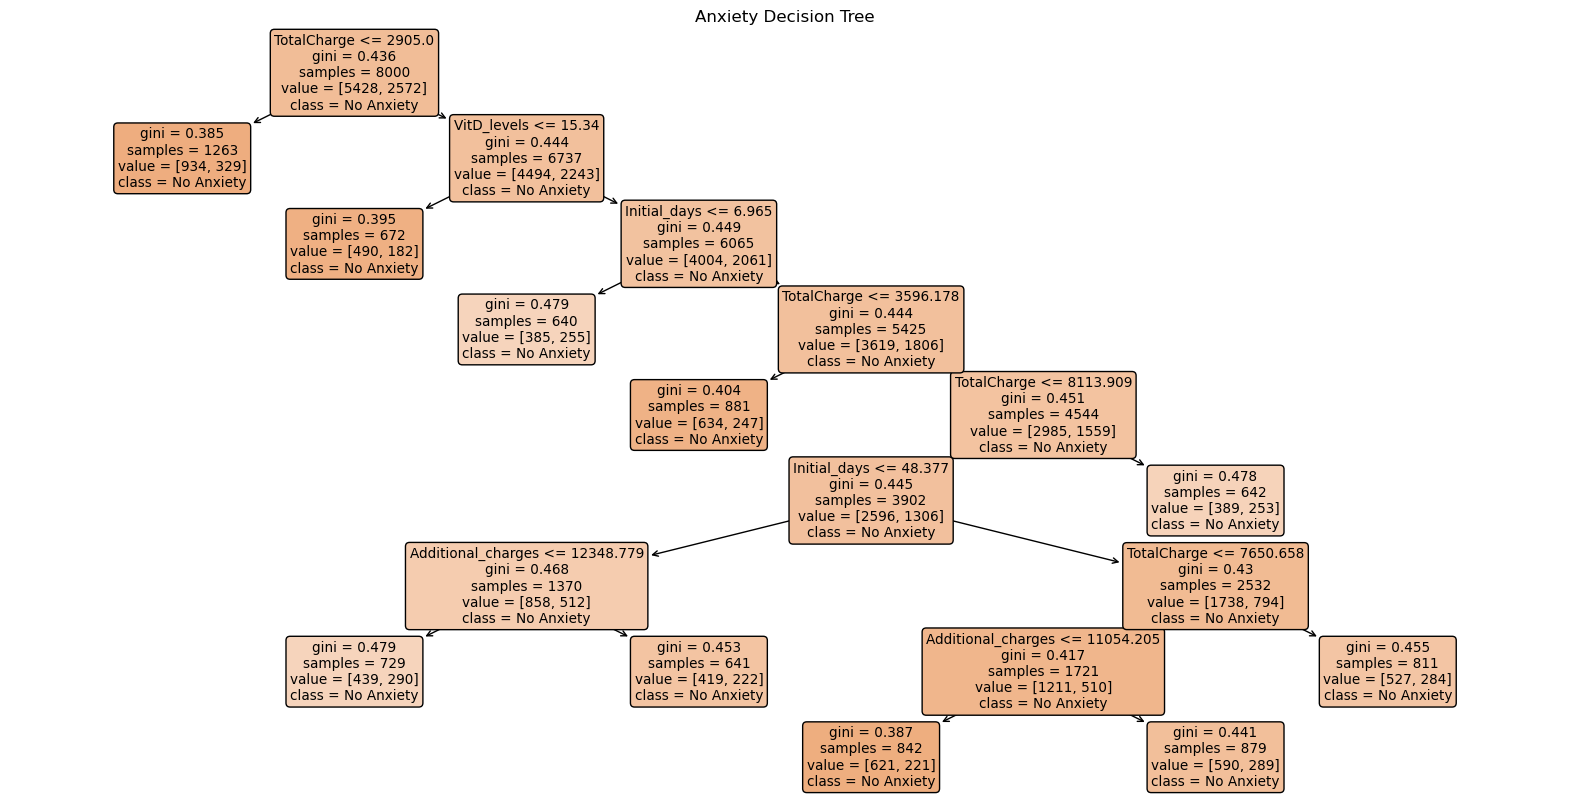

In [25]:
# Visualixe the Decision Tree
plt.figure(figsize=(20, 10)) 

# Convert X.columns to a list
feature_names = list(X.columns)

# Plot the decision tree
plot_tree(best_model, filled=True, feature_names=feature_names, class_names=['No Anxiety', 'Anxiety'], rounded=True)

plt.title('Anxiety Decision Tree')
plt.show()

In [26]:
# Predict test set labels
final_Y_pred = final_ada.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(Y_test, final_Y_pred)
print('Test set accuracy of final decision tree model: {:.2f}'.format(final_acc_test)) 

Test set accuracy of final decision tree model: 0.59


In [27]:
# Compute the probabilities of obtaining the positive class
final_Y_pred_proba = final_ada.predict_proba(X_test)[:, 1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(Y_test, final_Y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(Y_test, final_Y_pred)
print("\nThe confusion matrix for this AdaBoosted Decision Tree model:")
print("Predicted No Anxiety | Predicted Anxiety")
print(f"                   {final_matrix[0]} Actual No Anxiety")
print(f"                   {final_matrix[1]} Actual Anxiety\n")



The confusion matrix for this AdaBoosted Decision Tree model:
Predicted No Anxiety | Predicted Anxiety
                   [1021  336] Actual No Anxiety
                   [488 155] Actual Anxiety



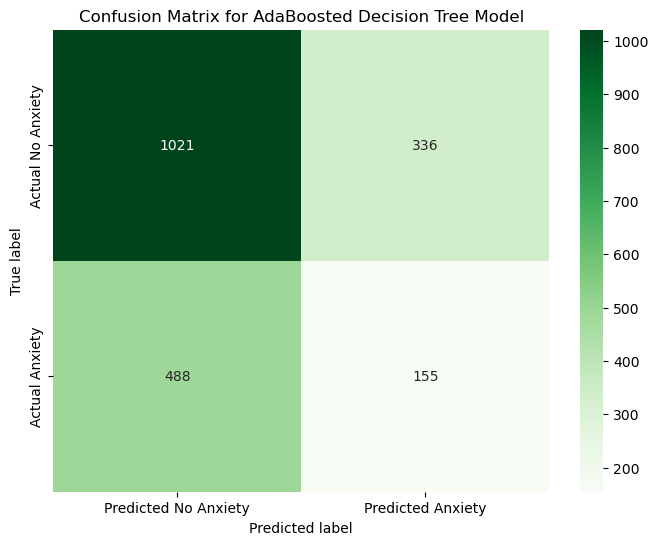

In [28]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(final_matrix, annot=True, cmap='Greens', fmt='g', 
            xticklabels=['Predicted No Anxiety', 'Predicted Anxiety'],
            yticklabels=['Actual No Anxiety', 'Actual Anxiety'])
plt.title('Confusion Matrix for AdaBoosted Decision Tree Model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [29]:
# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(Y_test, final_Y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}")

The mean squared error of this model is: 0.412
The root mean squared error of this model is: 0.64


In [30]:
# AUC Score
print('\nThe Area Under the Curve (AUC) score of the final decision tree model is: {:.2f}'.format(final_roc_auc))


The Area Under the Curve (AUC) score of the final decision tree model is: 0.51


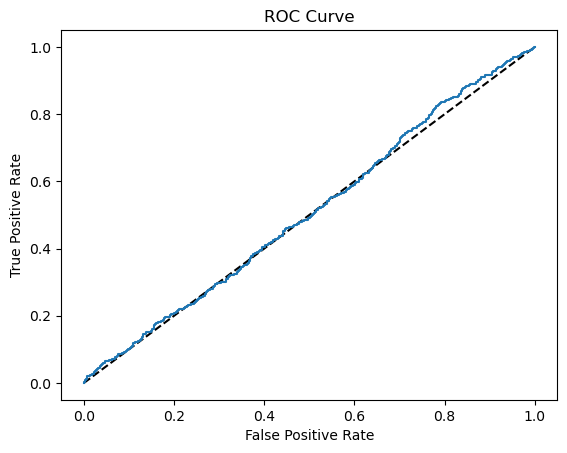

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1357
           1       0.32      0.24      0.27       643

    accuracy                           0.59      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.56      0.59      0.57      2000



In [31]:
# Generate ROC plot and provide AUC score 
fpr, tpr, thresholds = roc_curve(Y_test, final_Y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Generate classification report
print(classification_report(Y_test, final_Y_pred))